<a href="https://colab.research.google.com/github/vpaliwal1/Fashion-Mnist-with-Pytorch/blob/master/FMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install torch

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [0]:
transform = transforms.Compose([transforms.Resize((28,28)),
transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

In [0]:
training_data = datasets.FashionMNIST(root= './data', train=True, download=True, transform=transform )
testing_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(dataset= training_data, batch_size=100, shuffle=True)
testing_loader = torch.utils.data.DataLoader(dataset= testing_data, batch_size=100, shuffle=False)

In [0]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

In [0]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

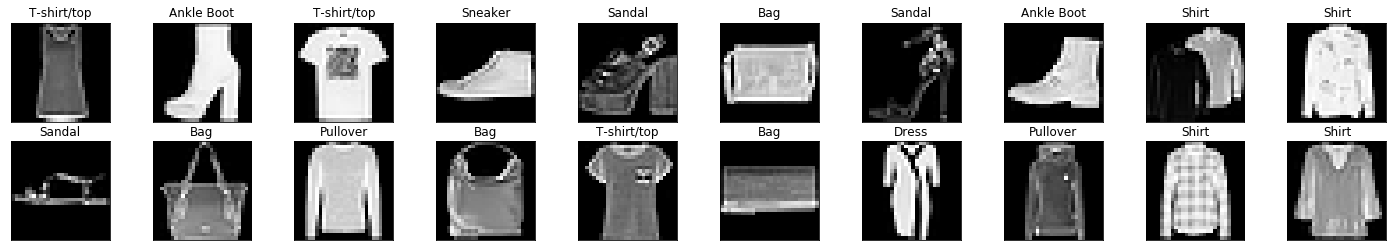

In [13]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))
 
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title(classes[labels[idx].item()])

In [0]:
class LeNet(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(1, 20, 5, 1)
      self.conv2 = nn.Conv2d(20, 50, 5, 1)
      self.fc1 = nn.Linear(4*4*50, 500)
      self.dropout1 = nn.Dropout(0.5)
      self.fc2 = nn.Linear(500, 10)
    def forward(self, x):
      x = F.relu(self.conv1(x))
      x = F.max_pool2d(x, 2, 2)
      x = F.relu(self.conv2(x))
      x = F.max_pool2d(x, 2, 2)
      x = x.view(-1, 4*4*50)
      x = F.relu(self.fc1(x))
      x = self.dropout1(x)
      x = self.fc2(x)
      return x

In [15]:
model = LeNet().to(device)
model

LeNet(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [17]:
epochs = 15
running_loss_hist = []
running_corrects_hist = []
test_running_loss_hist = []
test_running_corrects_hist= []

for r in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  test_running_loss = 0.0
  test_running_corrects = 0.0

  for inputs,labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs,1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for test_inputs, test_labels in testing_loader:
        test_inputs = test_inputs.to(device)
        test_labels = test_labels.to(device)
        test_outputs = model(test_inputs)
        test_loss = criterion(test_outputs, test_labels)

        _, test_preds = torch.max(test_outputs,1)
        test_running_loss += test_loss.item()
        test_running_corrects += torch.sum(test_preds == test_labels.data)

      


    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/len(training_loader)
    running_loss_hist.append(epoch_loss)
    running_corrects_hist.append(epoch_acc)

    test_epoch_loss = test_running_loss/len(testing_loader)
    test_epoch_acc = test_running_corrects.float()/len(testing_loader)
    test_running_loss_hist.append(test_epoch_loss)
    test_running_corrects_hist.append(test_epoch_acc)
    print('epoch:', (r+1))

    print('training loss: {:.4f}, acc: {:.4f}'.format(epoch_loss, epoch_acc.item())) 
    print('testing loss: {:.4f}, acc: {:.4f}'.format(test_epoch_loss, test_epoch_acc.item())) 

epoch: 1
training loss: 0.8529, acc: 70.8367
testing loss: 0.5968, acc: 77.6000
epoch: 2
training loss: 0.5278, acc: 80.4367
testing loss: 0.5116, acc: 81.2300
epoch: 3
training loss: 0.4556, acc: 83.6083
testing loss: 0.4478, acc: 83.8200
epoch: 4
training loss: 0.4111, acc: 85.1633
testing loss: 0.4186, acc: 85.0300
epoch: 5
training loss: 0.3818, acc: 86.3267
testing loss: 0.3896, acc: 85.9200
epoch: 6
training loss: 0.3579, acc: 87.1900
testing loss: 0.3779, acc: 86.4000
epoch: 7
training loss: 0.3408, acc: 87.7867
testing loss: 0.3694, acc: 86.4100
epoch: 8
training loss: 0.3266, acc: 88.2567
testing loss: 0.3543, acc: 87.3700
epoch: 9
training loss: 0.3151, acc: 88.6033
testing loss: 0.3396, acc: 87.8600
epoch: 10
training loss: 0.3045, acc: 89.0550
testing loss: 0.3380, acc: 87.8800
epoch: 11
training loss: 0.2942, acc: 89.3683
testing loss: 0.3251, acc: 88.4500
epoch: 12
training loss: 0.2865, acc: 89.6833
testing loss: 0.3207, acc: 88.6900
epoch: 13
training loss: 0.2783, acc:

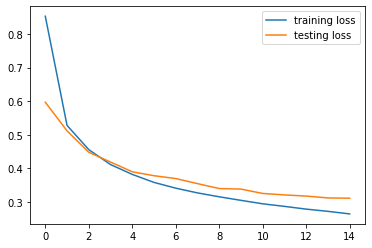

In [18]:
plt.plot(running_loss_hist, label = 'training loss')
plt.plot(test_running_loss_hist, label = 'testing loss')
plt.legend()

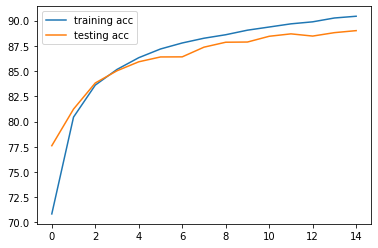

In [19]:
plt.plot(running_corrects_hist, label = 'training acc')
plt.plot(test_running_corrects_hist, label = 'testing acc')
plt.legend()

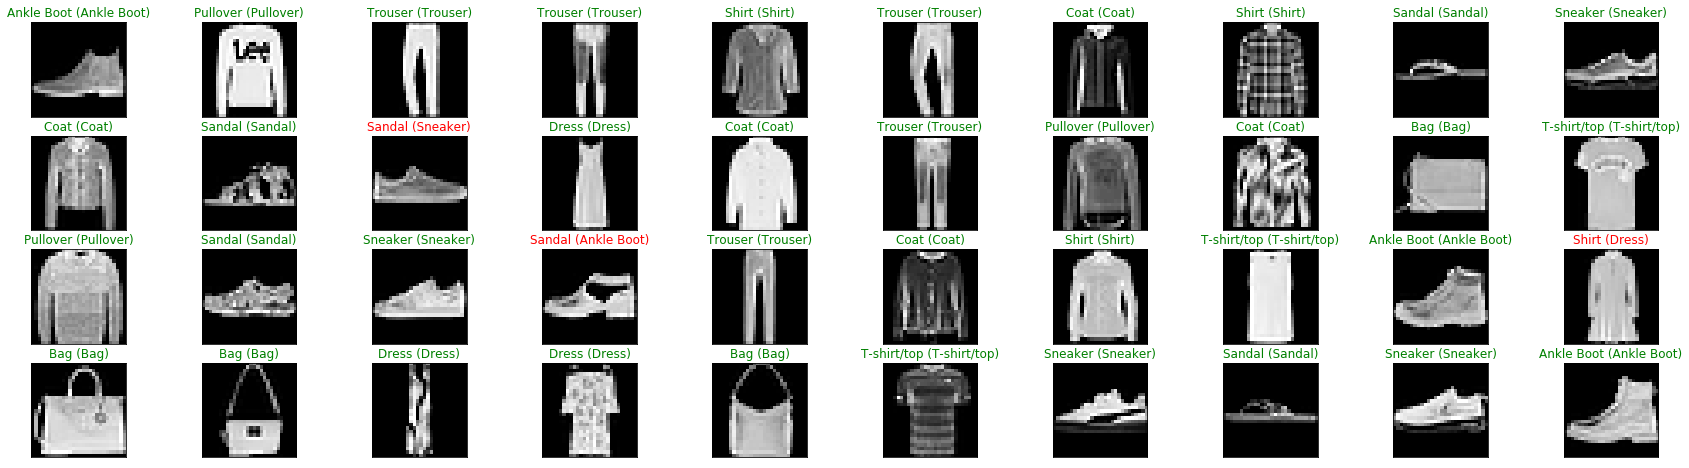

In [22]:
dataiter = iter(testing_loader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)
 
fig = plt.figure(figsize=(30, 8))
 
for idx in np.arange(40):
  ax = fig.add_subplot(4, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))